## Key takeaways
- Using one feature at a time you can tell apart the species of the penguin.
- In classification problems we might usually want to **do a `pairplot`**
- Species in the source data are not evenly distributed so it's better to use a **non uniform prior** that will reflect the fact that Chimpstrap with 68 rows carries less information than Adelie with 152 
- There are two approaches: naive and non-naive depending on the assumption of **independence of the features**. They differ on how the likelihood is computed:
	- For the naive one computes a normal pdf on a single number `norm(10, 5).pdf(3)` but it's still a pdf as **probability densities are not probabilities**
	- For the non-naive one computes a  `multivariate_normal` that is the multi variable counterpart of a normal distribution.
		See also
- The penguin is determined by the MAP

## `PenguinClassifier` class
Basically I implemented the classification algorithm both naive and non-naive approaches inside a class. The docstrings contain the details, but in a nutshell these are the main methods:
- `PenguinClassifier.df`: the data source after transforming a bit the headers of the columns
- `PenguinClassifier.show_pair_plot`: display the features in pairs using `seaborn.pairplot`
- `PenguinClassifier.run`: compute one prediction for the given features.
- `PenguinClassifier.accuracy`: compute the accuracy of the algorithm over the whole dataset matching `species` with predictions.

The argument `Naive` allows to choose among the two approaches.

In [1]:
from py_scripts.penguin_classifier import PenguinClassifier
pc = PenguinClassifier()
pc.df.head()  # show the source of the data

,studyname,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15_n,delta_13_c,comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


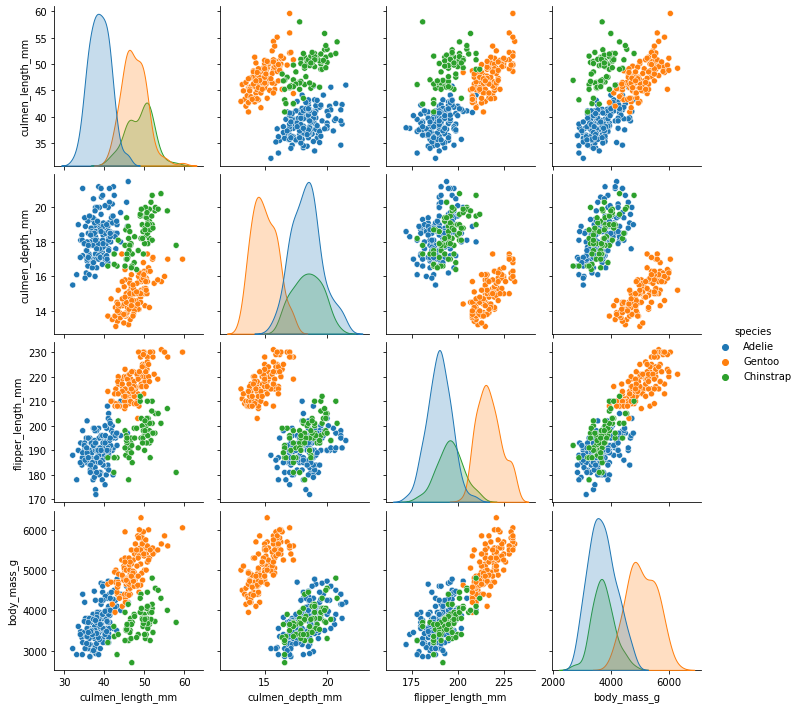

In [2]:
pc.show_pair_plot()

In [3]:
PenguinClassifier(
    culmen_length=93,
    flipper_length=193,
    culmen_depth=18,
    body_mass=3500,
    naive=False
).run()

,prior,likes,posterior
species,,,
Adelie,0.441860,4.999152e-140,1.057705e-61
Chinstrap,0.197674,1.056492e-78,1.000000e+00
Gentoo,0.360465,9.300030e-151,1.605206e-72


In [4]:
pc.accuracy()  # The default is naive=True

0.9707602339181286

In [5]:
PenguinClassifier(naive=False).accuracy()

0.9883040935672515